## Import Libraries

In [1]:
import os
import librosa
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.python.keras import utils
from keras.utils import to_categorical
from numpy import load

### Load Spectrogram and Label Numpy Array from npy file

In [2]:
# load Labels array
y = load('Data/labels.npy')

In [3]:
# load Spectrogam array
X = load('Data/mel_specs.npy')

#### Train test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=.2)

In [5]:
X_test.shape

(200, 128, 660)

In [6]:
X_train.shape

(799, 128, 660)

#### Reshaping images to be 128 x 660 x 1, where the 1 represents the single color channel

In [7]:
X_train = X_train.reshape(X_train.shape[0], 128, 660, 1)
X_test = X_test.reshape(X_test.shape[0], 128, 660, 1)

#### One hot encoding our labels

In [8]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### Define the Convolutional Neural Network Model

In [9]:
model = Sequential(name='CNN')
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 660, 1)))
model.add(MaxPooling2D(pool_size=(2,4)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,4)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

### Compile the Model

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Model Summary

In [11]:
model.summary()

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 658, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 164, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 162, 64)       18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 40, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 76800)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                4915264   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650     

### Train the model

In [12]:
history = model.fit(X_train, y_train, batch_size=20, validation_data=(X_test, y_test), epochs=25)

Epoch 1/25
40/40 [==============================] - 35s 877ms/step - loss: 22.1986 - accuracy: 0.1101 - val_loss: 2.3021 - val_accuracy: 0.1050
Epoch 2/25
40/40 [==============================] - 34s 859ms/step - loss: 2.2603 - accuracy: 0.1740 - val_loss: 2.0776 - val_accuracy: 0.2450
Epoch 3/25
40/40 [==============================] - 34s 856ms/step - loss: 1.8811 - accuracy: 0.3579 - val_loss: 1.8681 - val_accuracy: 0.2750
Epoch 4/25
40/40 [==============================] - 40s 1s/step - loss: 1.3372 - accuracy: 0.5394 - val_loss: 1.9428 - val_accuracy: 0.3050
Epoch 5/25
40/40 [==============================] - 46s 1s/step - loss: 0.8847 - accuracy: 0.7184 - val_loss: 1.9659 - val_accuracy: 0.4250
Epoch 6/25
40/40 [==============================] - 34s 861ms/step - loss: 0.4676 - accuracy: 0.8611 - val_loss: 2.2554 - val_accuracy: 0.3550
Epoch 7/25
40/40 [==============================] - 45s 1s/step - loss: 0.2805 - accuracy: 0.9149 - val_loss: 2.1077 - val_accuracy: 0.4200
Epoch 8

### Check the Model's train loss and test loss over epochs.

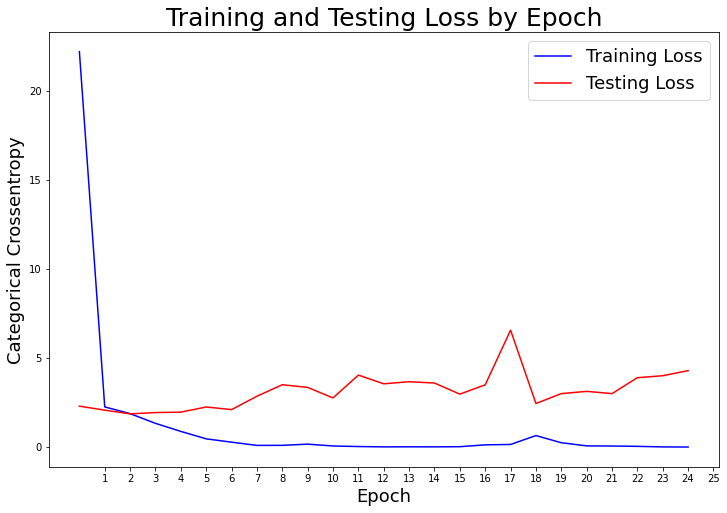

In [13]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(test_loss, label='Testing Loss', color='red')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(1,26), range(1,26))

plt.legend(fontsize = 18);

### Check the Model's train accuracy and test accuracy over epochs.

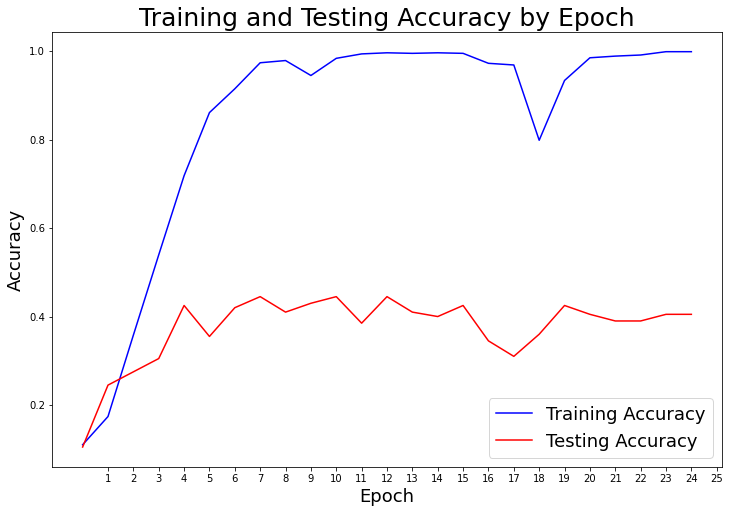

In [14]:
train_loss = history.history['accuracy']
test_loss = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Accuracy', color='blue')
plt.plot(test_loss, label='Testing Accuracy', color='red')

# Set title
plt.title('Training and Testing Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Accuracy', fontsize = 18)
plt.xticks(range(1,26), range(1,26))

plt.legend(fontsize = 18);

### Evaluate the model

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

7/7 - 2s - loss: 4.2957 - accuracy: 0.4050


In [16]:
print(test_acc)

0.4050000011920929


### Making predictions with the CNN model

In [17]:
predictions = model.predict(X_test, verbose=1)

7/7 [==============================] - 2s 304ms/step


### CNN Confusion Matrix

In [18]:
conf_matrix = confusion_matrix(np.argmax(y_test, 1), np.argmax(predictions, 1))
conf_matrix

array([[ 5,  0,  1,  1,  0,  0,  0,  1,  8,  4],
       [ 0, 13,  3,  2,  0,  2,  0,  0,  0,  0],
       [ 2,  3,  7,  2,  0,  0,  0,  1,  2,  3],
       [ 1,  2,  2,  5,  3,  0,  0,  2,  2,  3],
       [ 0,  0,  0,  0, 13,  1,  1,  2,  2,  1],
       [ 0,  2,  5,  1,  1,  6,  0,  0,  4,  1],
       [ 2,  0,  0,  0,  3,  0, 12,  0,  1,  2],
       [ 0,  2,  2,  2,  1,  0,  0,  9,  3,  1],
       [ 1,  0,  2,  1,  3,  1,  0,  3,  7,  2],
       [ 2,  0,  2,  3,  2,  0,  1,  2,  4,  4]], dtype=int64)

In [19]:
confusion_df = pd.DataFrame(conf_matrix)
confusion_df

,0,1,2,3,4,5,6,7,8,9
0,5,0,1,1,0,0,0,1,8,4
1,0,13,3,2,0,2,0,0,0,0
2,2,3,7,2,0,0,0,1,2,3
3,1,2,2,5,3,0,0,2,2,3
4,0,0,0,0,13,1,1,2,2,1
5,0,2,5,1,1,6,0,0,4,1
6,2,0,0,0,3,0,12,0,1,2
7,0,2,2,2,1,0,0,9,3,1
8,1,0,2,1,3,1,0,3,7,2
9,2,0,2,3,2,0,1,2,4,4


#### Matching the Encoded Labels 

In [20]:
labels_dict = {
        0: 'blues',
        1: 'classical',
        2: 'country',
        3: 'disco',
        4: 'hiphop',
        5: 'jazz',
        6: 'metal',
        7: 'pop',
        8: 'reggae',
        9: 'rock'
    }

In [21]:
confusion_df = confusion_df.rename(columns=labels_dict, index=labels_dict)

In [22]:
confusion_df

,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
blues,5,0,1,1,0,0,0,1,8,4
classical,0,13,3,2,0,2,0,0,0,0
country,2,3,7,2,0,0,0,1,2,3
disco,1,2,2,5,3,0,0,2,2,3
hiphop,0,0,0,0,13,1,1,2,2,1
jazz,0,2,5,1,1,6,0,0,4,1
metal,2,0,0,0,3,0,12,0,1,2
pop,0,2,2,2,1,0,0,9,3,1
reggae,1,0,2,1,3,1,0,3,7,2
rock,2,0,2,3,2,0,1,2,4,4


#### Creating a heatmap for the confusion matrix for display

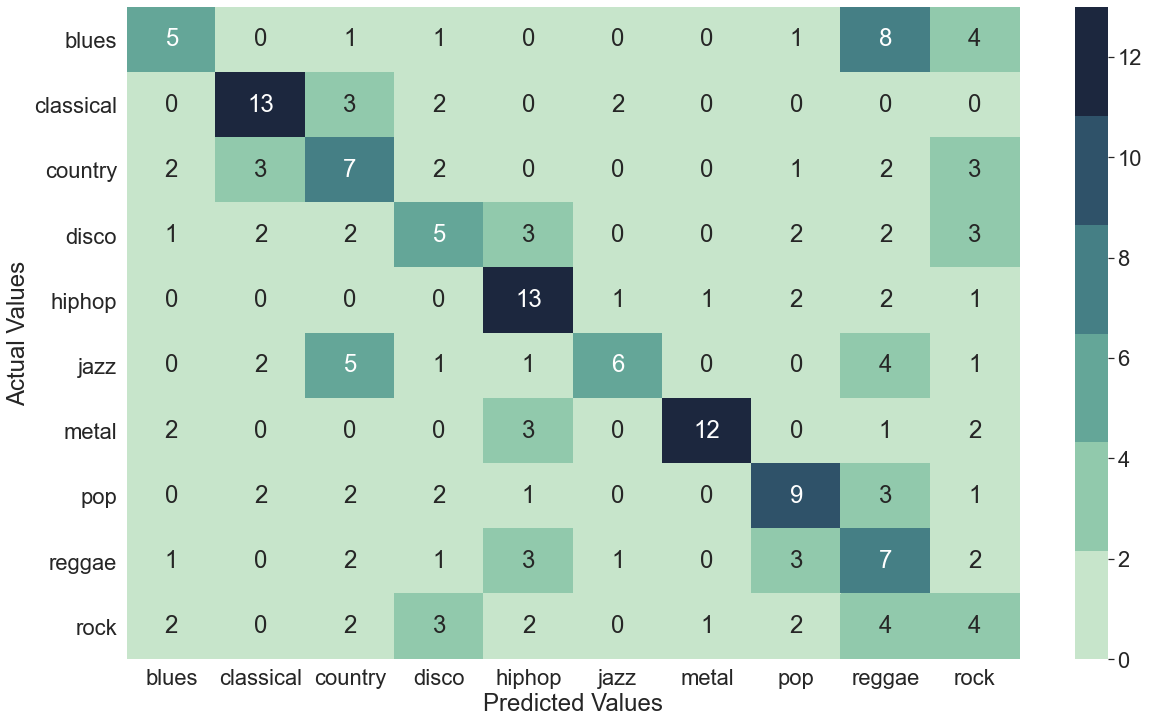

In [23]:
plt.figure(figsize= (20,12))
sns.set(font_scale = 2);
ax = sns.heatmap(confusion_df, annot=True, cmap=sns.cubehelix_palette(rot=-.4));
ax.set(xlabel='Predicted Values', ylabel='Actual Values');

In [24]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, 1),  np.argmax(predictions, 1)))

              precision    recall  f1-score   support

           0       0.38      0.25      0.30        20
           1       0.59      0.65      0.62        20
           2       0.29      0.35      0.32        20
           3       0.29      0.25      0.27        20
           4       0.50      0.65      0.57        20
           5       0.60      0.30      0.40        20
           6       0.86      0.60      0.71        20
           7       0.45      0.45      0.45        20
           8       0.21      0.35      0.26        20
           9       0.19      0.20      0.20        20

    accuracy                           0.41       200
   macro avg       0.44      0.40      0.41       200
weighted avg       0.44      0.41      0.41       200

